# Table of Contents
1. [📊 Understand the Data](#understand-the-data)
2. [🧹 Data Cleaning](#data-cleaning)
   1. [Best Practice](#best-practice)
3. [🔍 Analysis](#analysis)
   1. [Correlation Matrix](#31)
   2. [Rating w/ price Comparisons](#32)
   3. [Rating and Price Relationship](#33)
   4. [Offers & Price Relationship](#34)
   5. [Different Field Analysis](#35)
   6. [Word Cloud of Delivery](#36)
   7. [Word Cloud of Sales volume](#37)
4. [📈 Conclusion](#conclusion)


<a id="understand-the-data"></a>
<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
    <h1 style="margin: 0;">
        <b>
            <span style="color: Black;">Chapter One</span>
            <span style="color: #ffffff;">|</span>
            <span style="color: #FEEC37;"> Understand the Data 📊
            </span>
        </b>
    </h1>
    <br>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>
</div>


In [1]:
import numpy as np  
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
from tabulate import tabulate
from wordcloud import WordCloud

import plotly.express as px  
import plotly.graph_objects as go  
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')


In [2]:
source = r'C:\Users\Rudra\Downloads\Python_Pandas_profiling\Phone_Search\phone search.csv'
df = pd.read_csv(source, encoding= 'unicode_escape')
df.sample(3)

,asin,product_title,product_price,product_original_price,currency,product_star_rating,product_num_ratings,product_url,product_photo,product_num_offers,...,is_amazon_choice,is_prime,product_availability,climate_pledge_friendly,sales_volume,delivery,has_variations,unit_price,unit_count,coupon_text
196,B0CKXNCDXY,"CAT S62 Rugged Cell Phone Unlocked (128GB, 4GB...",$169.00,NaN,USD,3.5,124,https://www.amazon.com/dp/B0CKXNCDXY,https://m.media-amazon.com/images/I/71XwZjeGwP...,4,...,False,True,Only 14 left in stock - order soon.,False,100+ bought in past month,"FREE delivery Tue, Sep 24 Only 14 left in stoc...",False,NaN,NaN,NaN
2,B09SM24S8C,"Samsung Galaxy A03s Cell Phone, AT&amp;T GSM U...",$69.00,$99.99,USD,3.8,597,https://www.amazon.com/dp/B09SM24S8C,https://m.media-amazon.com/images/I/51m45B3Yy+...,35,...,False,True,NaN,False,2K+ bought in past month,"FREE delivery Tue, Sep 24",True,NaN,NaN,NaN
206,B0D7SBL8PJ,X40 Unlocked 5G Cell Phones 2024 Android 13 Mo...,$99.99,NaN,USD,5.0,4,https://www.amazon.com/dp/B0D7SBL8PJ,https://m.media-amazon.com/images/I/61q3aJhItC...,1,...,False,False,NaN,False,50+ bought in past month,FREE delivery,True,NaN,NaN,NaN


In [3]:
print("The size of the DataFrame:",df.size, '\n')
print('The Shape of the DataFrame', df.shape, '\n')
print("Available columns in the DataFrame:", df.columns)

The size of the DataFrame: 7480 

The Shape of the DataFrame (340, 22) 

Available columns in the DataFrame: Index(['asin', 'product_title', 'product_price', 'product_original_price',
       'currency', 'product_star_rating', 'product_num_ratings', 'product_url',
       'product_photo', 'product_num_offers', 'product_minimum_offer_price',
       'is_best_seller', 'is_amazon_choice', 'is_prime',
       'product_availability', 'climate_pledge_friendly', 'sales_volume',
       'delivery', 'has_variations', 'unit_price', 'unit_count',
       'coupon_text'],
      dtype='object')


In [4]:
# info summary
info = {
    "Index": df.index,
    "Columns": df.columns.tolist(),
    "Non-Null Count": df.notnull().sum().tolist(),
    "Dtype": df.dtypes.tolist()
}

# Convert to a format suitable for tabulation
info_table = zip(info["Columns"], info["Non-Null Count"], info["Dtype"])

# Print the summary information in a table format
print(tabulate(info_table, headers=["Column", "Non-Null Count", "Dtype"], tablefmt="rounded_grid"))

╭─────────────────────────────┬──────────────────┬─────────╮
│ Column                      │   Non-Null Count │ Dtype   │
├─────────────────────────────┼──────────────────┼─────────┤
│ asin                        │              340 │ object  │
├─────────────────────────────┼──────────────────┼─────────┤
│ product_title               │              340 │ object  │
├─────────────────────────────┼──────────────────┼─────────┤
│ product_price               │              336 │ object  │
├─────────────────────────────┼──────────────────┼─────────┤
│ product_original_price      │              148 │ object  │
├─────────────────────────────┼──────────────────┼─────────┤
│ currency                    │              336 │ object  │
├─────────────────────────────┼──────────────────┼─────────┤
│ product_star_rating         │              337 │ float64 │
├─────────────────────────────┼──────────────────┼─────────┤
│ product_num_ratings         │              340 │ int64   │
├───────────────────────

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
asin,340,315,B0BQ118F2T,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_title,340,315,Moto G Play 2023 3-Day Battery Unlocked Made f...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_price,336,241,$99.99,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_original_price,148,108,$119.99,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
currency,336,1,USD,336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_star_rating,337.0,NaN,NaN,NaN,4.087537,0.383544,1.6,3.9,4.1,4.3,5.0
product_num_ratings,340.0,NaN,NaN,NaN,2744.05,7331.816833,0.0,135.25,503.5,1874.25,64977.0
product_url,340,315,https://www.amazon.com/dp/B0BQ118F2T,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_photo,340,304,https://m.media-amazon.com/images/I/71zGrrAe5N...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_num_offers,340.0,NaN,NaN,NaN,8.426471,10.798389,1.0,1.75,4.0,11.0,83.0


<Axes: >

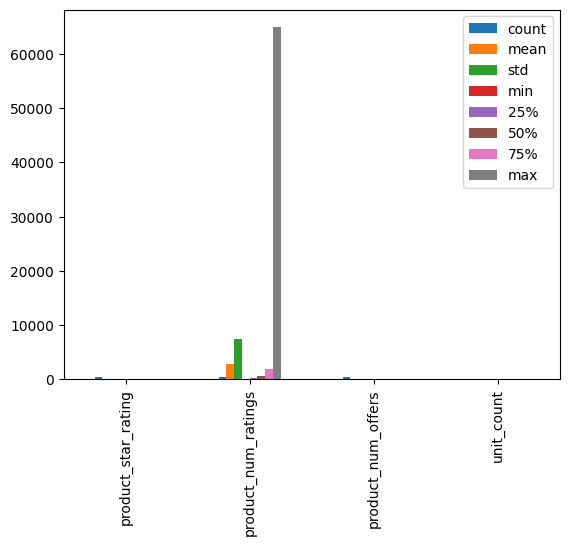

In [6]:
df.describe().T.plot(kind='bar')


<a id="data-cleaning"></a>
<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
    <h1 style="margin: 0;">
        <b>
            <span style="color: Black;">Chapter Two</span>
            <span style="color: #ffffff;">|</span>
            <span style="color: #FEEC37;"> Data Cleaning 🧹
            </span>
        </b>
    </h1>
    <br>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>
</div>


In [7]:
df.duplicated().sum()

21

In [8]:
df.isnull().sum()

asin                             0
product_title                    0
product_price                    4
product_original_price         192
currency                         4
product_star_rating              3
product_num_ratings              0
product_url                      0
product_photo                    0
product_num_offers               0
product_minimum_offer_price      4
is_best_seller                   0
is_amazon_choice                 0
is_prime                         0
product_availability           265
climate_pledge_friendly          0
sales_volume                    20
delivery                         3
has_variations                   0
unit_price                     336
unit_count                     336
coupon_text                    318
dtype: int64

<Axes: >

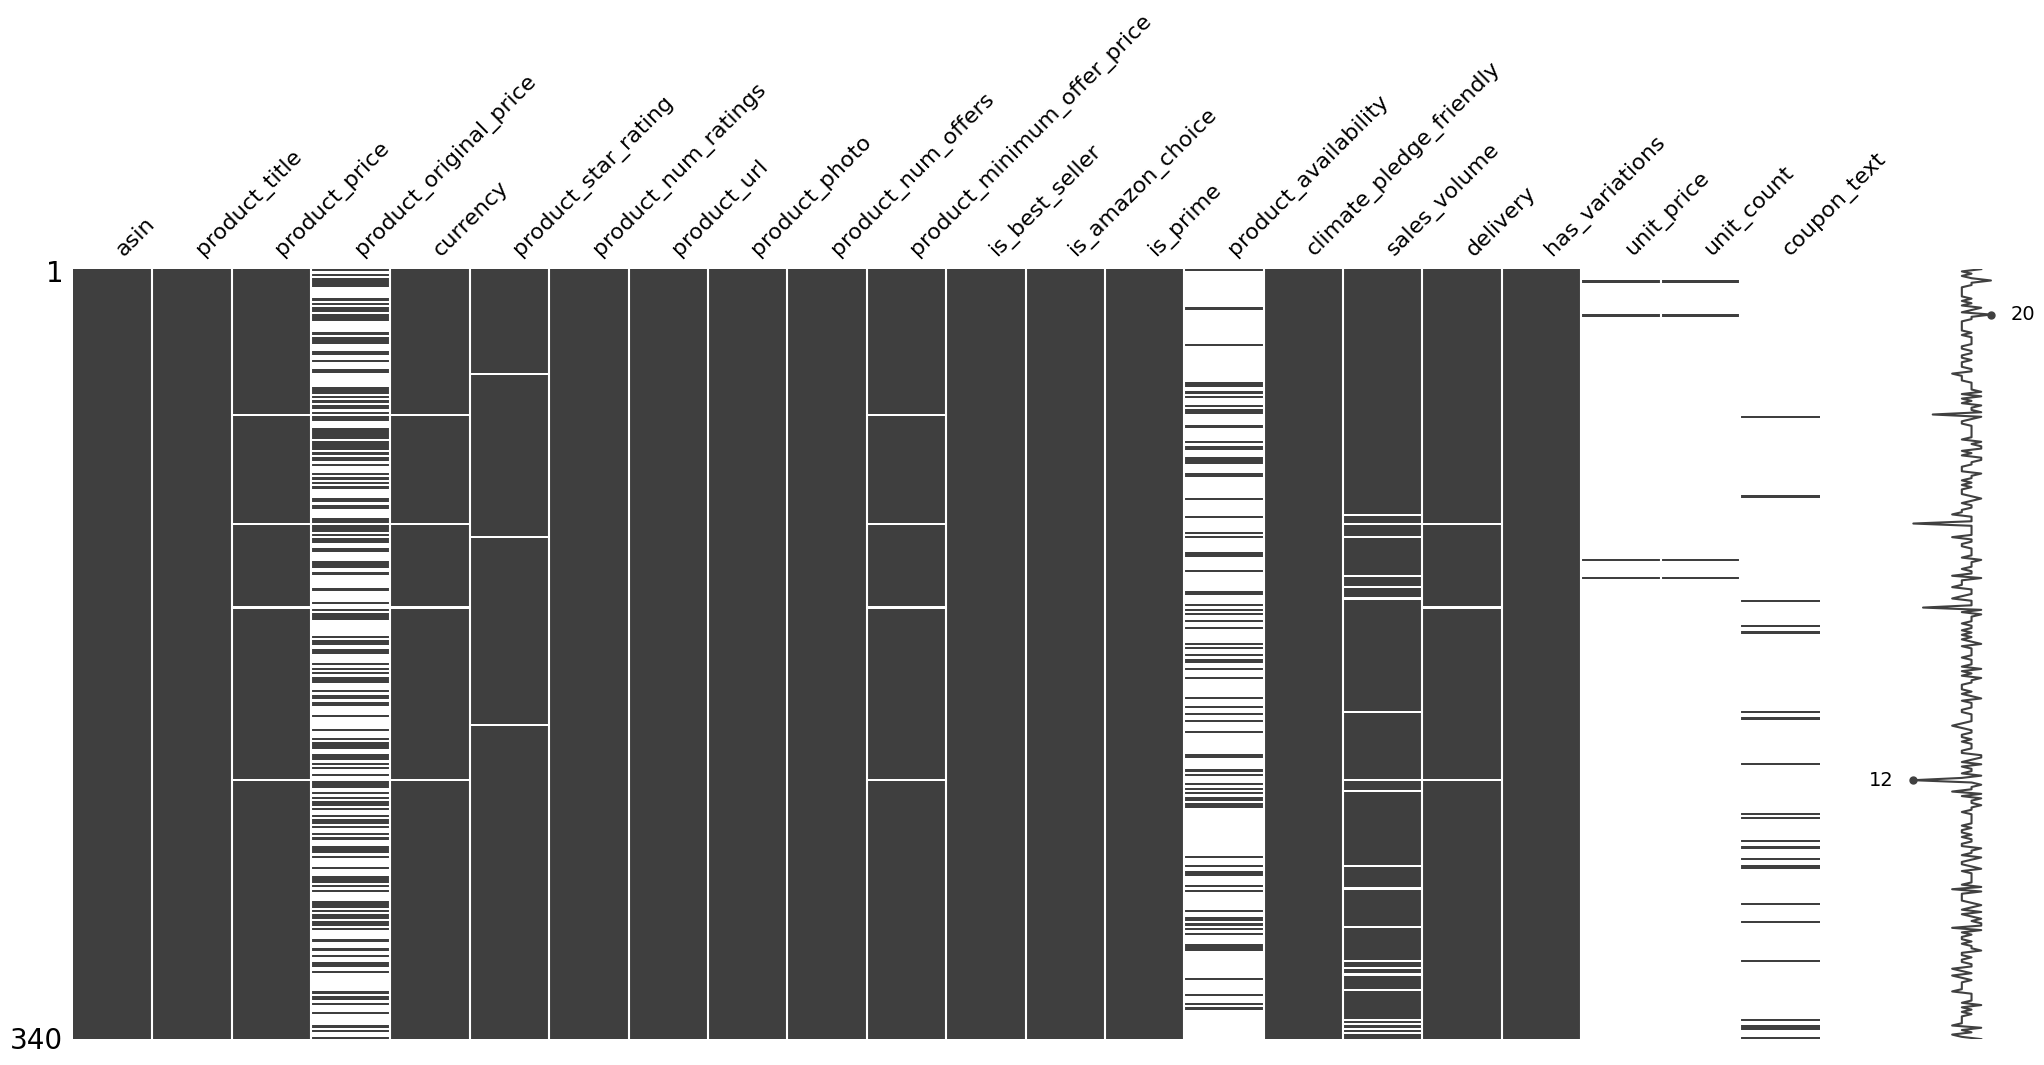

In [9]:
msno.matrix(df)

<a id="best-practice"></a>
<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
<p style="color: Black;">
   ⭐ <b>Best Practice before clean the data have a copy of Original Data<b>
   <pre  style="color: Black; font-size: 20px;">
   1. Remove the duplicated data
   2. Delete these columns (unit_price, unit_count, coupon_text,product_original_price,product_availability )
   3. currency, product_url, product_photo, Deleted no sense for analysis 
   4. Change the Price & product_minimum_offer_price into int
   </pre>
</p>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>
</div>

In [11]:
dfc = df.copy()

In [12]:
dfc.sample()

,asin,product_title,product_price,product_original_price,currency,product_star_rating,product_num_ratings,product_url,product_photo,product_num_offers,...,is_amazon_choice,is_prime,product_availability,climate_pledge_friendly,sales_volume,delivery,has_variations,unit_price,unit_count,coupon_text
295,B00ZYHA1KI,Hamilton CapTel 2400i Captioned Telephone Larg...,$75.00,NaN,USD,4.3,1603,https://www.amazon.com/dp/B00ZYHA1KI,https://m.media-amazon.com/images/I/71+l3QY48E...,4,...,False,True,NaN,False,300+ bought in past month,"FREE delivery Tue, Sep 24",False,NaN,NaN,NaN


In [13]:
dfc['currency'].unique() #All values are USD or nan so remove it.

array(['USD', nan], dtype=object)

In [14]:
dfc.columns

Index(['asin', 'product_title', 'product_price', 'product_original_price',
       'currency', 'product_star_rating', 'product_num_ratings', 'product_url',
       'product_photo', 'product_num_offers', 'product_minimum_offer_price',
       'is_best_seller', 'is_amazon_choice', 'is_prime',
       'product_availability', 'climate_pledge_friendly', 'sales_volume',
       'delivery', 'has_variations', 'unit_price', 'unit_count',
       'coupon_text'],
      dtype='object')

In [15]:
# drop the columns 
dfc.drop(columns=['currency', 'product_original_price','unit_price', 'unit_count','coupon_text','product_url','product_photo','product_availability',], inplace=True)

In [16]:
# Change the Datatypes
dfc['product_minimum_offer_price'] = dfc['product_minimum_offer_price'].str.replace('$', '').str.replace(',', '').str.strip().astype('float')
dfc['product_price'] = dfc['product_price'].str.replace('$', '').str.replace(',', '').str.strip().astype('float')

In [17]:
dfc[['sales_volume',	'delivery']].sample(3)

,sales_volume,delivery
292,50+ bought in past month,"FREE delivery Tue, Sep 24"
161,100+ bought in past month,"FREE delivery Tue, Sep 24"
105,1K+ bought in past month,"FREE delivery Tue, Sep 24 on $35 of items ship..."


<a id="analysis"></a>
<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
    <h1 style="margin: 0;">
        <b>
            <span style="color: Black;">Chapter Three</span>
            <span style="color: #ffffff;">|</span>
            <span style="color: #FEEC37;"> Analysis 🔍
            </span>
        </b>
    </h1>
    <br>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>
</div>


<a id="31"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 1. Correlation Matrix</b>
</div>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>

In [18]:
numeric_df = dfc.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr().T

fig = px.imshow(correlation_matrix, text_auto=True, aspect="auto",
                title='Correlation Matrix',
                color_continuous_scale='viridis')
fig.show()

<a id="32"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 2. Star Rating with Price Comparisons </b>
</div>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>

In [19]:
# Create subplots with 2 rows and 1 column
fig = make_subplots(rows=2, cols=1, subplot_titles=['Star Rating vs. Product Price', 'Star Rating vs. Minimum Offer Price'])

# First histogram for 'product_star_rating' vs. 'product_price'
hist1 = px.histogram(dfc, x='product_star_rating', y='product_price')
fig.add_trace(hist1.data[0], row=1, col=1)

# Second histogram for 'product_star_rating' vs. 'product_minimum_offer_price'
hist2 = px.histogram(dfc, x='product_star_rating', y='product_minimum_offer_price')
fig.add_trace(hist2.data[0], row=2, col=1)

# Update the layout and show the figure
fig.update_layout(title_text='Star Rating with Price Comparisons', height=800, width=1200)
fig.show()

<a id="33"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 3.Rating and Price Relationship </b>
</div>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>

In [20]:
fig = px.scatter_ternary(
    dfc,
    a=dfc['product_price'],
    b=dfc['product_num_ratings'],
    c=dfc['product_star_rating'],
    color=dfc['has_variations'],
    title='Rating and Price Relationship',
    
)

fig.show()

<a id="34"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡4. Offers and Price Relationship </b>
</div>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>

In [21]:
import plotly.express as px

# Create a ternary scatter plot
fig = px.scatter_ternary(
    dfc,
    a='product_price',
    b=dfc['product_num_offers'],
    c=dfc['product_minimum_offer_price'],
    size='product_num_ratings',
    size_max=60,
    color='has_variations',
    title='Offers and Price Relationship'
)

# Display the figure
fig.show()


<a id="35"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 5. Different Field Analysis</b>
</div>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>

In [22]:
# Create subplots with 3 rows and 2 columns
fig = make_subplots(
    rows=3,
    cols=2,
    subplot_titles=('Amazon Choice', 'Best Seller', 'Prime Member', 'Climate Friendly', 'Has Variations'),
    specs=[[{'type': 'pie'}, {'type': 'pie'}], 
           [{'type': 'pie'}, {'type': 'pie'}], 
           [{'type': 'pie'}, None]]
)

# Add a pie chart for 'is_amazon_choice' in the first subplot
fig.add_trace(
    go.Pie(labels=dfc['is_amazon_choice'].value_counts().index, 
           values=dfc['is_amazon_choice'].value_counts().values, 
           name='Amazon Choice', rotation=50), 
    row=1, 
    col=1
)

# Add a pie chart for 'is_best_seller' in the second subplot
fig.add_trace(
    go.Pie(labels=dfc['is_best_seller'].value_counts().index, 
           values=dfc['is_best_seller'].value_counts().values, 
           name='Best Seller', rotation=50), 
    row=1, 
    col=2
)

# Add a pie chart for 'is_prime' in the third subplot
fig.add_trace(
    go.Pie(labels=dfc['is_prime'].value_counts().index,
           values=dfc['is_prime'].value_counts().values,
           name='Prime Member'),
    row=2,
    col=1
)

# Add a pie chart for 'climate_pledge_friendly' in the fourth subplot
fig.add_trace(
    go.Pie(labels=dfc['climate_pledge_friendly'].value_counts().index,
           values=dfc['climate_pledge_friendly'].value_counts().values,
           name='Climate Friendly'),
    row=2,
    col=2
)

# Add a pie chart for 'has_variations' in the fifth subplot
fig.add_trace(
    go.Pie(labels=dfc['has_variations'].value_counts().index,
           values=dfc['has_variations'].value_counts().values,
           name='Has Variations'),
    row=3,
    col=1
)

# Update layout for better visualization
fig.update_layout(
    title_text='Different Field Analysis', 
    height=1000, 
    width=1200
)

# Display the figure
fig.show()


<a id="36"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 6.Word Cloud of Delivery </b>
</div>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>

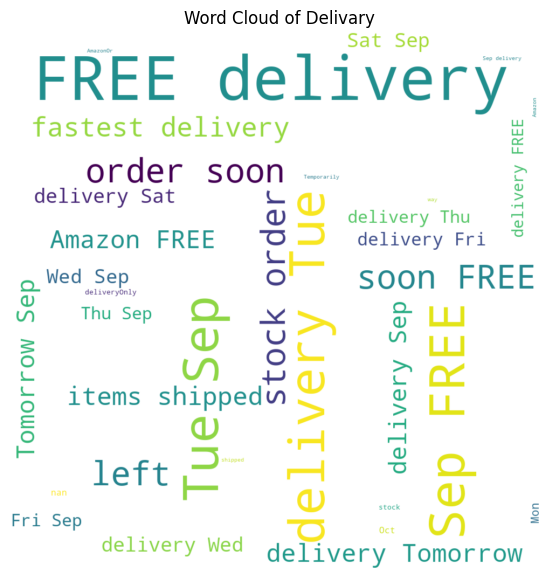

In [23]:
# Create a string of text
text = ' '.join(dfc['delivery'].astype(str) )

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=1000, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title("Word Cloud of Delivary")
plt.show()

<a id="37"></a>
### <div style="text-align:left; border-radius:15px; padding:20px; color:Black; margin:0; font-size:100%; font-family:Arial; background-color:#48cae4; overflow:hidden"><b>⚡ 7.Word Cloud of Sales volume </b>
<a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 15px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
</a>
</div>

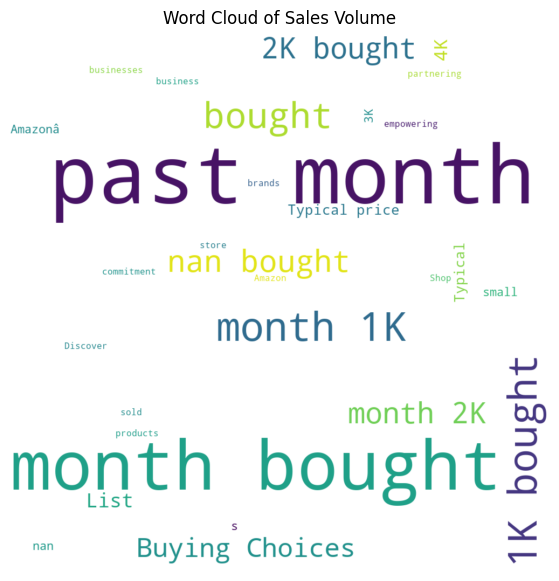

In [24]:
# Create a string of text 
text = ' '.join(dfc['sales_volume'].astype(str) )

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=1000, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title("Word Cloud of Sales Volume")
plt.show()

<a id="conclusion"></a>
<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
    <h1 style="margin: 0;">
        <b>
            <span style="color: Black;">Last but not least, the final chapter</span>
            <br><span style="color: #ffffff;">|</span>
            <span style="color: #FEEC37;"> Draw an Conclusion 📝
            </span>
        </b>
    </h1>
<br>
    <a href="#table-of-contents" style="font-family: Arial, sans-serif; font-size: 20px; background-color: #7b2cbf; color: #ffffff; padding: 7px 15px; text-decoration: none; border-radius: 15px;">
        [Table of Content 📜⬆️]
    </a>
</div>


<div style="background-color: #48cae4; border-radius: 15px; padding: 20px; text-align: left;">
<div class="alert alert-block alert-info">
<h2><B>Conclusion </B></h2>

1. **Product Rating:** The majority of products on the platform have higher ratings, indicating a generally positive customer experience.

2. **Price Trends:** During offer periods, there is a noticeable drop in product prices, making it an ideal time for customers to make purchases.

3. **Amazon Choice and Best Seller Products:** Both Amazon Choice and Best Seller products represent a small portion of the total, indicating limited availability or selection under these categories.

4. **Prime Membership:** Approximately **27%** of the customers are Prime members, suggesting a moderate uptake of the membership benefits.

5. **Best Sellers:** Less than **1%** of the products are marked as Best Sellers on Amazon, showing the exclusivity of this label.

6. **Product Variations:** A significant **70.6%** of products come with variations, such as different sizes, colors, or models, offering customers more options.

7. **Climate Consciousness:** Around **77%** of customers prefer climate-friendly products, highlighting a growing awareness and preference for sustainable options.

8. **Customer Attraction:** The term "FREE DELIVERY" appears frequently, indicating that customers are highly attracted to products that offer free shipping.

These conclusions provide insights into customer preferences, product trends, and market dynamics on the platform.

</div>
